# Insert 10 examples into the water_quality table

In [30]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')


data = pd.read_csv('data/water_potability.csv')
df = data.sample(frac=1).reset_index(drop=True)

examples = df.head(10)
examples

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,196.139312,10540.342278,6.459460,359.168722,400.679602,13.583559,45.900706,4.149483,0
1,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
2,7.744773,208.920340,27648.159653,5.622572,332.823799,397.057474,12.486192,73.184557,5.016321,0
3,10.188433,286.567991,7105.800709,9.840540,321.686059,437.879508,12.871599,78.732055,4.635243,0
4,7.184973,201.079219,25234.427972,5.216684,283.744612,384.011558,12.427538,23.136611,3.665411,0
5,7.886591,213.052591,38852.029636,11.170789,281.700777,326.115350,10.385172,64.662501,4.589984,1
6,10.049674,132.832837,11557.032038,8.550573,323.508072,442.768050,13.376149,92.176170,5.133478,1
7,10.041028,113.831112,16266.434445,7.939074,363.866890,557.486061,13.195341,75.233221,3.807563,1
8,9.920691,202.817483,9973.934059,6.882248,337.350529,333.192470,23.917601,71.833624,4.690707,0
9,8.028304,204.783735,20408.485598,4.531581,406.328921,515.575097,21.558863,70.547218,3.915991,0


In [9]:
# Check whether NaN is or not.
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
# Delete rows which have NaN.
df.dropna(axis = 0, inplace = True)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2,6.548018,176.006536,38368.012618,7.415054,278.093309,291.121528,19.422535,81.368568,5.930228,0
3,6.512901,169.217480,25151.411574,4.613311,375.612318,296.074382,15.088700,74.075926,4.404040,1
4,4.016590,255.616569,28612.266107,7.340595,290.690661,442.385118,9.305733,71.342132,4.417134,0
6,7.744125,203.396227,21403.002048,7.623242,333.210903,424.328740,16.949811,48.416725,3.612260,1
8,5.985012,151.360967,20155.434469,7.723292,275.079738,478.332360,18.016266,99.061233,3.764100,1
...,...,...,...,...,...,...,...,...,...,...
3269,6.306864,220.969980,22418.908189,7.153364,283.975993,350.909227,19.861382,61.836185,4.619173,0
3270,7.606067,248.041453,14609.976883,6.356555,322.356572,275.317146,11.706095,94.775244,4.581477,0
3273,8.242559,155.616112,24042.188160,7.639210,338.293868,418.263757,13.265853,66.577952,3.529427,1
3274,5.368988,250.660916,15973.686891,6.416298,277.151938,334.819954,15.684362,44.040382,3.737883,0


In [11]:
# check whether there is no NaN from now on.
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [12]:
# Check paramter type of this dataset.
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

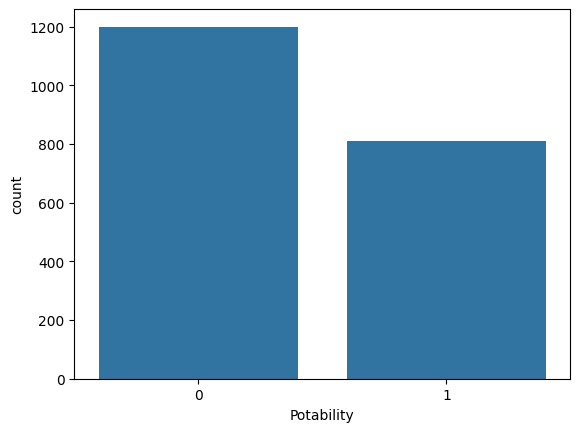

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df, x = df["Potability"])
plt.show()

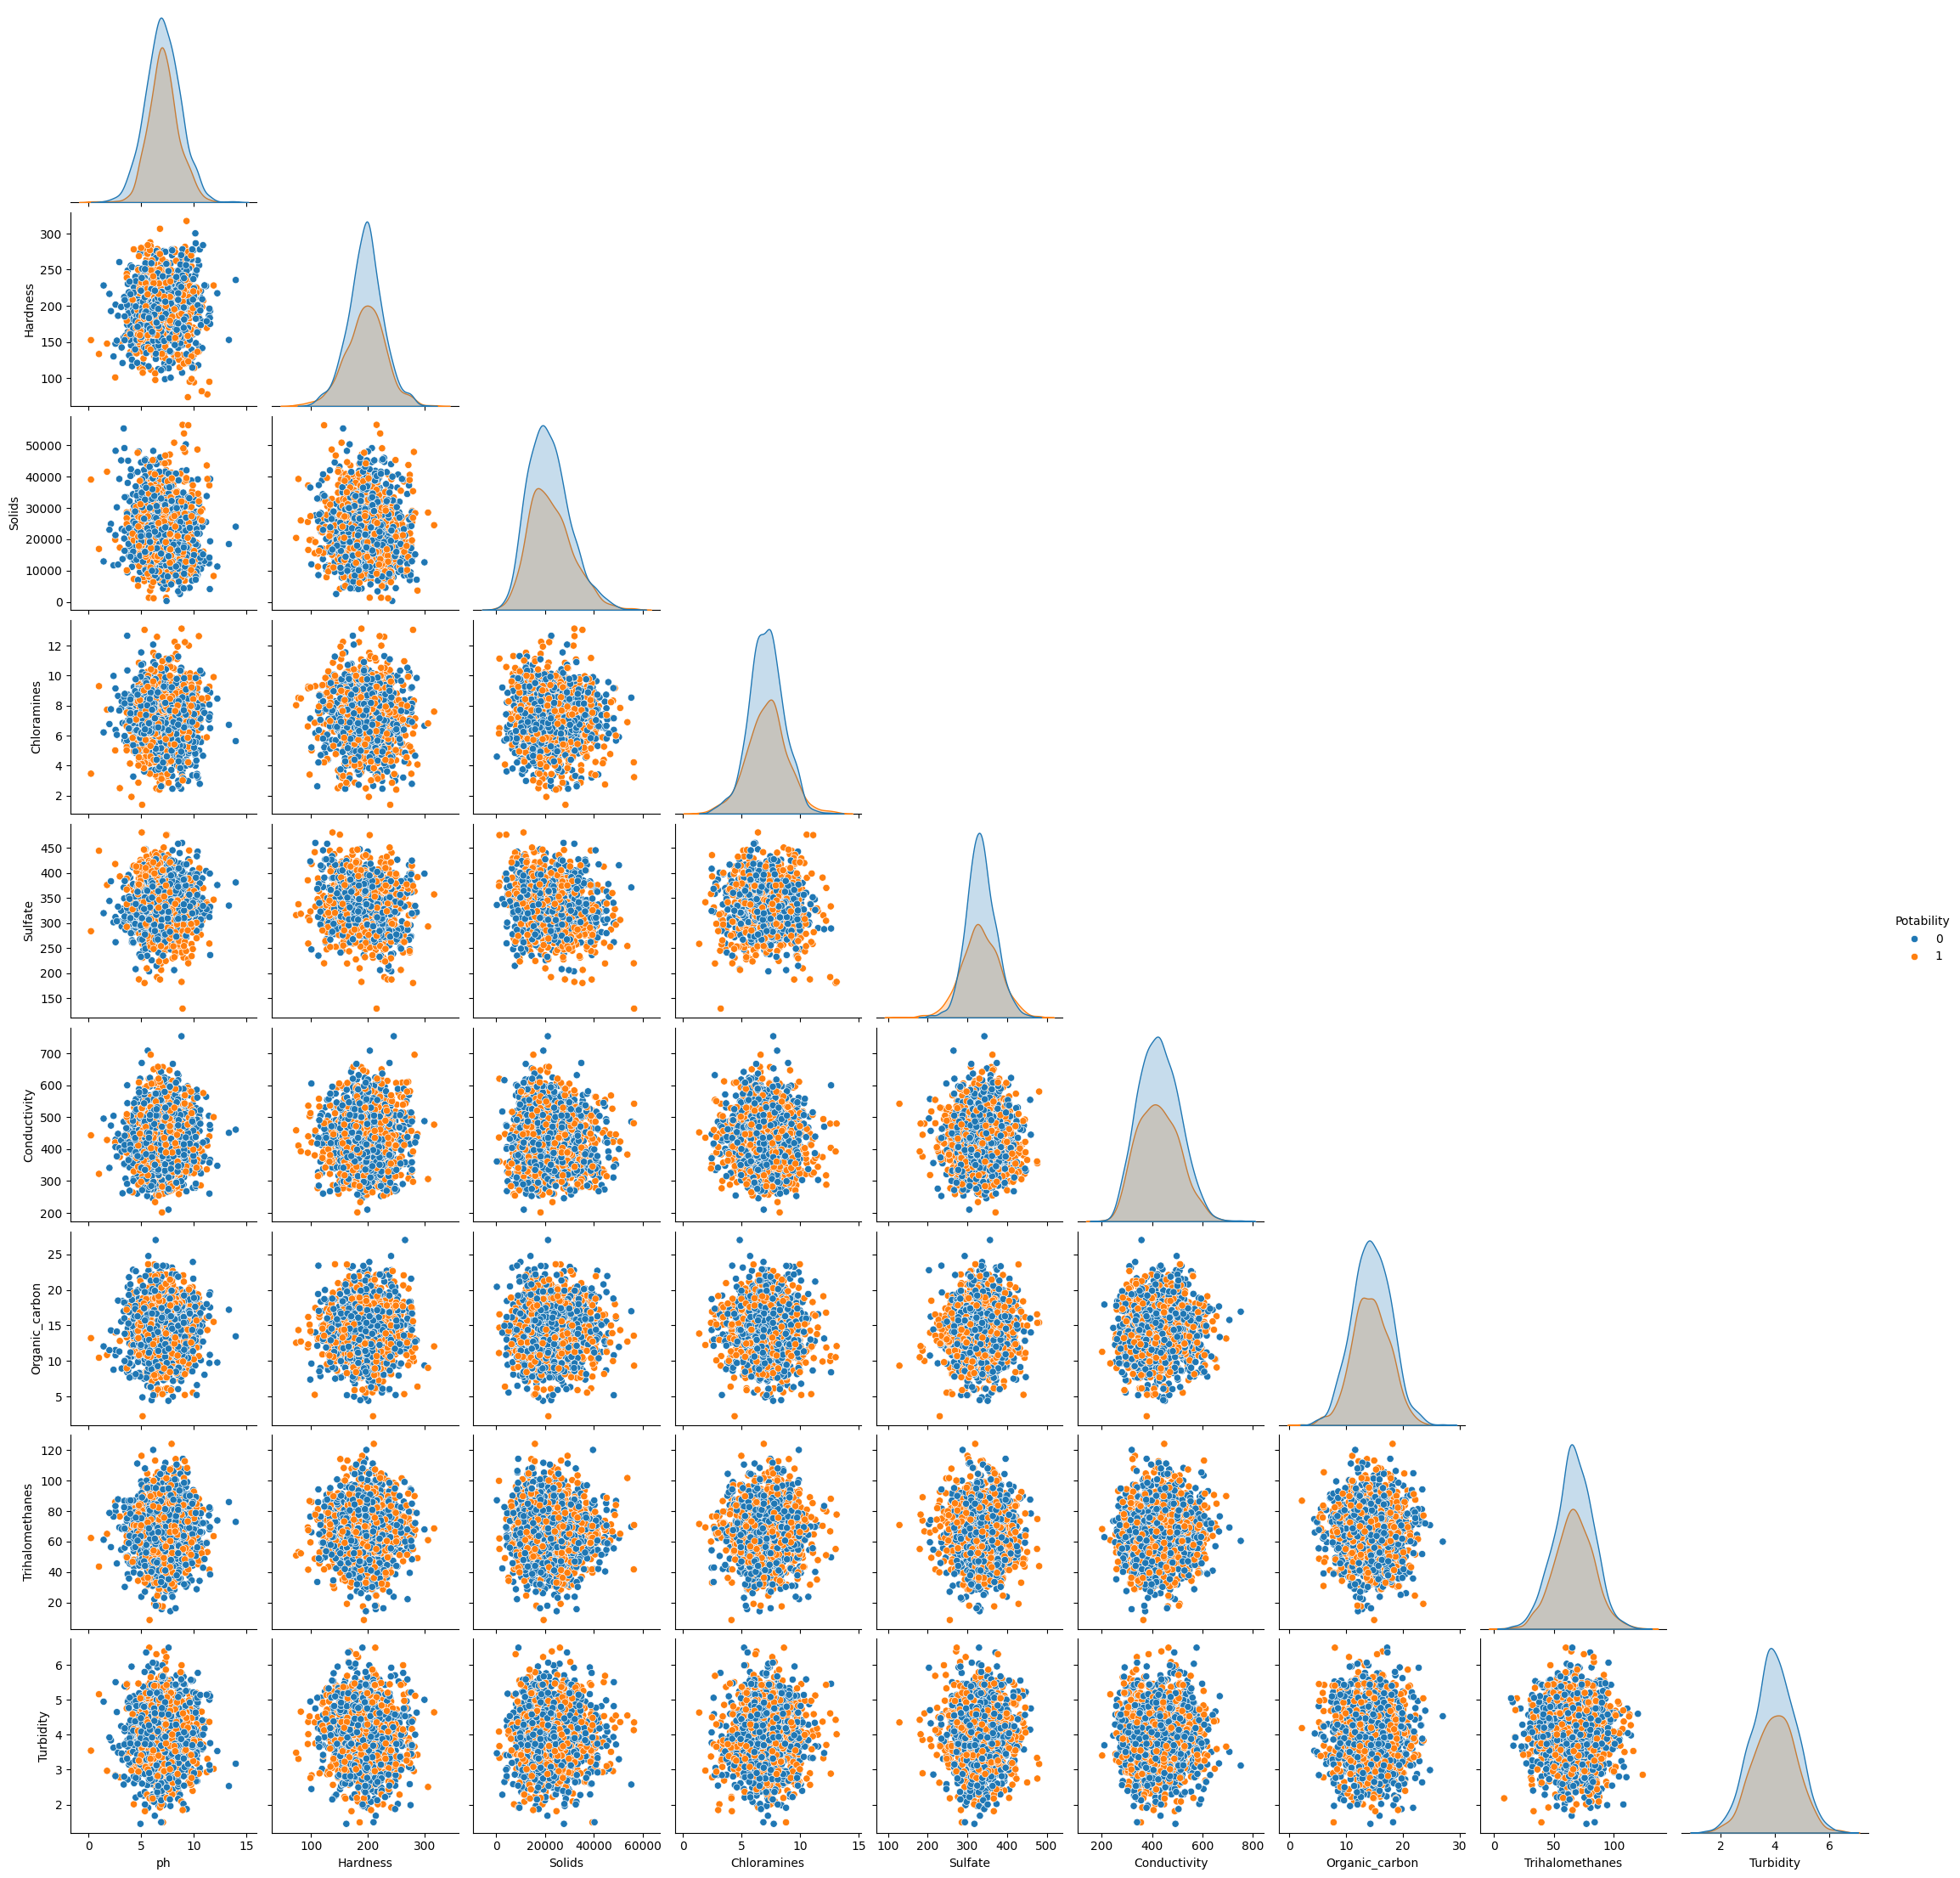

In [15]:
sns.pairplot(df, hue = "Potability", corner = True)
plt.show()

In [16]:
# checking which parameters are correlated with "Potability".
df_corr = df.corr()
df_corr["Potability"].sort_values(ascending = False)

Potability         1.000000
Solids             0.040674
Turbidity          0.022682
Chloramines        0.020784
ph                 0.014530
Trihalomethanes    0.009244
Hardness          -0.001505
Sulfate           -0.015303
Conductivity      -0.015496
Organic_carbon    -0.015567
Name: Potability, dtype: float64